# 파이토치를 통한 타이타닉 생존자 예측

## 데이터셋 로드

In [546]:
# 데이터 분석을 위한 pandas, 시각화를 위한 seaborn 불러오기
import pandas as pd
import seaborn as sns

df=sns.load_dataset("titanic")

# 문자형 데이터 수치로 변환하여 저장
df=df.replace({False:0,True:1,"no":0,"yes":1,'male':0,'female':1,'man':0,'woman':1,'child':2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,0,1,NaN,Southampton,0,0
1,1,1,1,38.0,1,0,71.2833,C,First,1,0,C,Cherbourg,1,0
2,1,3,1,26.0,0,0,7.9250,S,Third,1,0,NaN,Southampton,1,1
3,1,1,1,35.0,1,0,53.1000,S,First,1,0,C,Southampton,1,0
4,0,3,0,35.0,0,0,8.0500,S,Third,0,1,NaN,Southampton,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,0,1,NaN,Southampton,0,1
887,1,1,1,19.0,0,0,30.0000,S,First,1,0,B,Southampton,1,1
888,0,3,1,NaN,1,2,23.4500,S,Third,1,0,NaN,Southampton,0,0
889,1,1,0,26.0,0,0,30.0000,C,First,0,1,C,Cherbourg,1,1


## 전체 데이터에 대한 기술 통계 확인

In [547]:
# describe 를 통해 기술 통계값을 확인합니다.
df.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889,891,891.000000,891.000000,203,889,891.000000,891.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,7,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,Third,NaN,NaN,C,Southampton,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644,491,NaN,NaN,59,644,NaN,NaN
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,NaN,NaN,0.490460,0.602694,NaN,NaN,0.383838,0.602694
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,NaN,NaN,0.660838,0.489615,NaN,NaN,0.486592,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,NaN,NaN,0.000000,1.000000,NaN,NaN,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000


### unique 값 확인하기

In [548]:
for i in df.columns:
  print(i,":",df[i].nunique())

survived : 2
pclass : 3
sex : 2
age : 88
sibsp : 7
parch : 7
fare : 248
embarked : 3
class : 3
who : 3
adult_male : 2
deck : 7
embark_town : 3
alive : 2
alone : 2


### 상관계수 확인하기

연관성이 있는 데이터 : pclass, sex, fare, who, adult_male, alone

In [549]:
corr=df.corr()
corr

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alive,alone
survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.472637,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.016018,0.094035,-0.338481,0.135207
sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.722076,-0.908578,0.543351,-0.303646
age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.468941,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.342977,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.413947,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.136513,-0.182024,0.257307,-0.271832
who,0.472637,-0.016018,0.722076,-0.468941,0.342977,0.413947,0.136513,1.000000,-0.914615,0.472637,-0.452753
adult_male,-0.557080,0.094035,-0.908578,0.280328,-0.253586,-0.349943,-0.182024,-0.914615,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.472637,-0.557080,1.000000,-0.203367


### 결측치 확인하기

In [550]:
# 결측치의 합계 구하기
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 결측치 제거

In [551]:
# dropna로 결측치를 제거합니다.
df=df.dropna()
df.shape

(182, 15)

### 필요없는 데이터 제거하기
* 머신러닝이나 딥러닝 모델은 내부에서 수치계산을 하기 때문에 숫자가 아닌 데이터를 넣어주면 모델이 학습과 예측을 할 수 없습니다.

In [552]:
# select_dtypes 를 통해 object 타입을 제외하고 가져옵니다.
df=df.select_dtypes(exclude="object")
df=df.drop(['alive','deck','class'],axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
1,1,1,1,38.0,1,0,71.2833,1,0,0
3,1,1,1,35.0,1,0,53.1000,1,0,0
6,0,1,0,54.0,0,0,51.8625,0,1,1
10,1,3,1,4.0,1,1,16.7000,2,0,0
11,1,1,1,58.0,0,0,26.5500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
871,1,1,1,47.0,1,1,52.5542,1,0,0
872,0,1,0,33.0,0,0,5.0000,0,1,1
879,1,1,1,56.0,0,1,83.1583,1,0,0
887,1,1,1,19.0,0,0,30.0000,1,0,1


## 데이터셋 나누기 : train/test

In [553]:
train_dataset = df.sample(frac=0.8, random_state=42)
test_dataset=df.drop(train_dataset.index)

In [554]:
# 정답 라벨 생성

train_labels=train_dataset.pop("survived")
test_labels=test_dataset.pop("survived")

train_dataset.shape,test_dataset.shape

((146, 9), (36, 9))

## 딥러닝 모델 만들기

In [555]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

print(torch.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x.shape
        # x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

1.9.0+cu102
Using cuda device


## 딥러닝 모델로 학습하기

In [556]:
# dataset 텐서로 변환
x_train=torch.tensor(np.array(train_dataset.values, dtype=np.float32))
y_train=torch.tensor(np.array(train_labels.values, dtype=np.float32))
y_train=y_train.view(-1, 1)
# print(x_train.shape, y_train.view(-1, 1).shape)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.mse_loss(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 50번마다 로그 출력
    if epoch % 1000 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.6]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/10000 Cost: 0.274843 Accuracy 65.75%
Epoch 1000/10000 Cost: 0.190780 Accuracy 69.86%
Epoch 2000/10000 Cost: 0.170522 Accuracy 74.66%
Epoch 3000/10000 Cost: 0.175156 Accuracy 71.92%
Epoch 4000/10000 Cost: 0.169013 Accuracy 72.60%
Epoch 5000/10000 Cost: 0.163973 Accuracy 75.34%
Epoch 6000/10000 Cost: 0.166548 Accuracy 76.71%
Epoch 7000/10000 Cost: 0.153803 Accuracy 76.03%
Epoch 8000/10000 Cost: 0.179329 Accuracy 75.34%
Epoch 9000/10000 Cost: 0.144994 Accuracy 78.08%
Epoch 10000/10000 Cost: 0.149756 Accuracy 79.45%


## 딥러닝 모델로 테스트하기

In [557]:
x_test=torch.tensor(np.array(test_dataset.values, dtype=np.float32))
y_test=torch.tensor(np.array(test_labels.values, dtype=np.float32))
y_test=y_test.view(-1, 1)

# H(x) 계산
hypothesis = model(x_test)
# print(hypothesis)

# cost 계산
cost = F.mse_loss(hypothesis, y_test)

# cost로 H(x) 개선
optimizer.zero_grad()
cost.backward()

prediction = hypothesis >= torch.FloatTensor([0.6]) # 예측값이 0.5를 넘으면 True로 간주
correct_prediction = prediction.float() == y_test # 실제값과 일치하는 경우만 True로 간주
accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
print('Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
    cost.item(), accuracy * 100,
))

Cost: 0.121081 Accuracy 83.33%


## 딥러닝 모델의 예측결과 평가하기


<Figure size 720x1080 with 0 Axes>

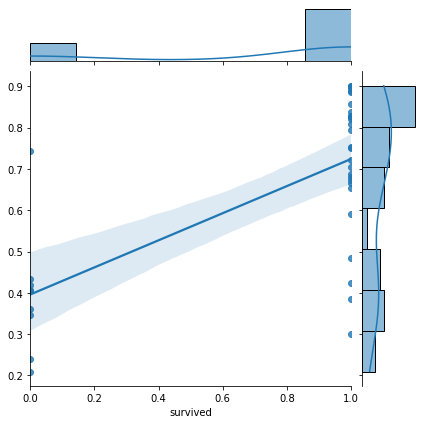

In [558]:
import matplotlib.pyplot as plt

y = hypothesis.view(-1).detach().numpy()

plt.figure(figsize=(10,15))
sns.jointplot(x=test_labels, y=y, kind="reg")